### 1b)

K = 0.5


<IPython.core.display.Javascript object>


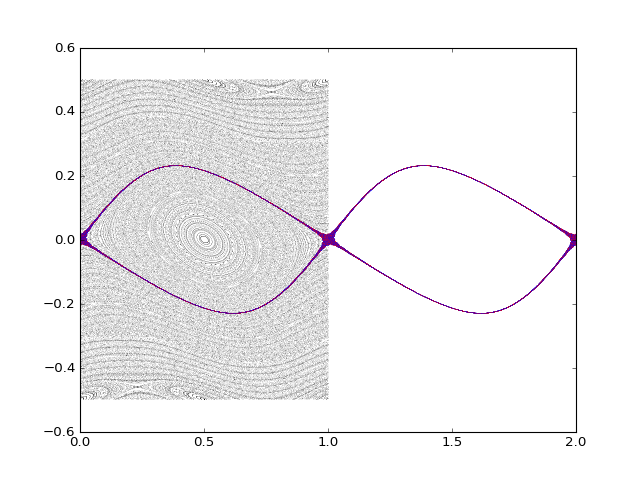

K = 1.0


<IPython.core.display.Javascript object>


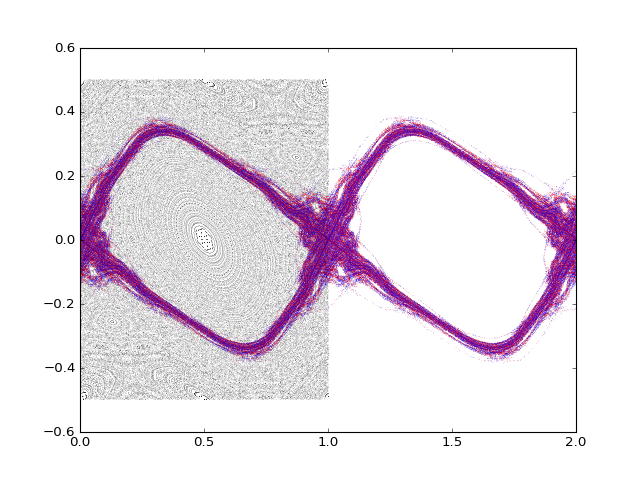

K = 1.5


<IPython.core.display.Javascript object>


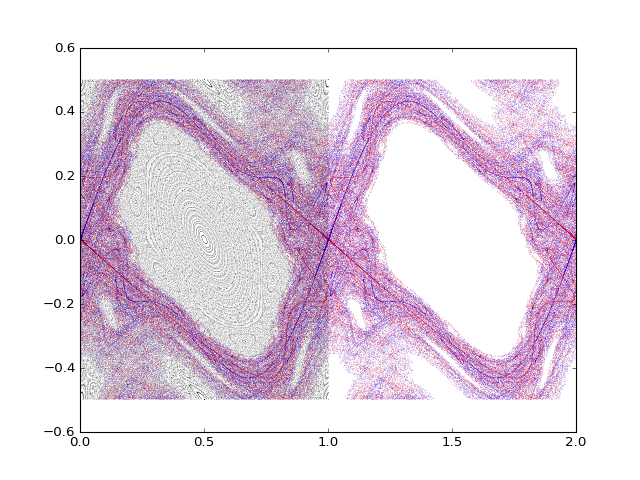

K = 2.0


<IPython.core.display.Javascript object>


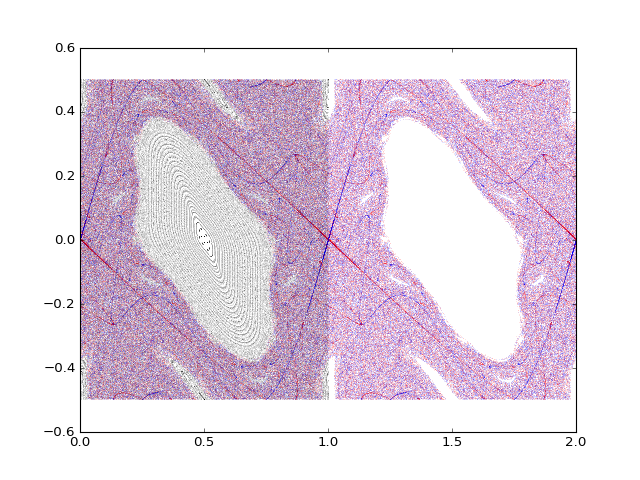

K = 2.5


<IPython.core.display.Javascript object>


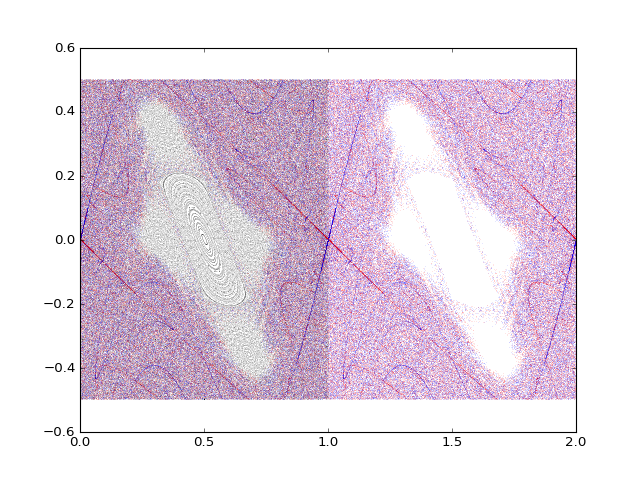

K = 3.0


<IPython.core.display.Javascript object>


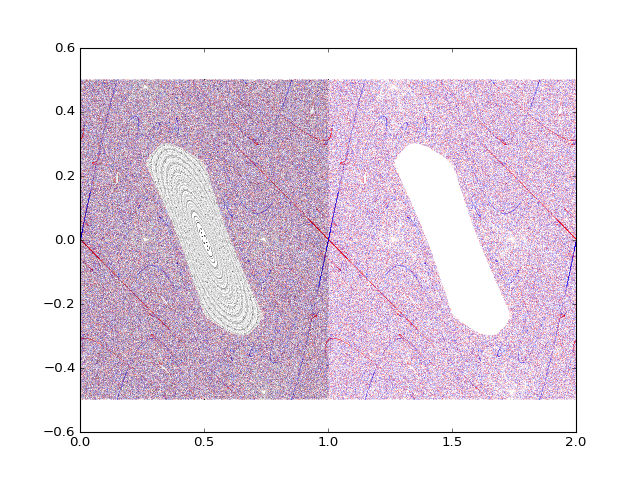

K = 3.5


<IPython.core.display.Javascript object>


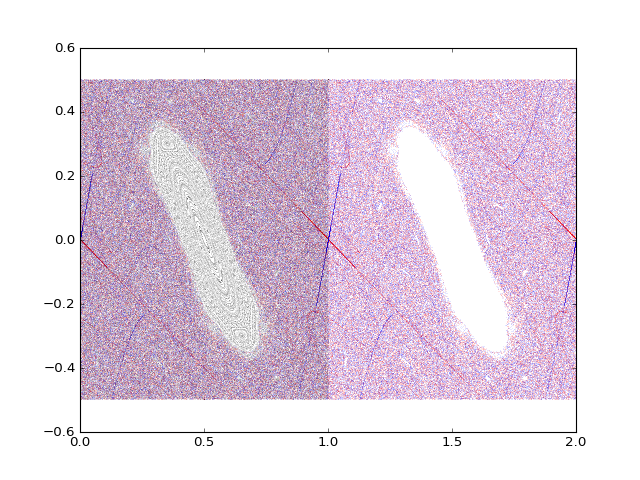

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

K = 1
ITER = 100 #iteration steps
NSTART = 1000 #number of starting points
GRID = 50 # number of grid cells
tau = 2 * np.pi
alpha = 0.1

def stdinv(X, P):
    return (np.mod(X - P + K / tau * np.sin(tau * X), 1), 
            np.mod(P - K / tau * np.sin(tau * X) + 0.5, 1) - 0.5)

def stdmap(X, P):
    return (np.mod(X + P, 1), 
            np.mod(P + K / tau * np.sin(tau * (X + P)) + 0.5, 1) - 0.5)

for K in (k / 2. for k in range(1,8)):
    print('K = ' + str(K))
    plt.figure()
    
    # init phase space portrait
    X1, P1 = np.meshgrid(np.linspace(0,1,GRID),np.linspace(-0.5,0.5,GRID))
    
    # init stable manifold
    P2 = (np.random.rand(NSTART, 1) * 2 - 1) / 1000
    X2 = -(K / 2 + np.sqrt(K**2 + 4 * K) / 2) * P2
    
    # init unstable manifold
    P3 = (np.random.rand(NSTART, 1) * 2 - 1) / 1000
    X3 = -(K / 2 - np.sqrt(K**2 + 4 * K) / 2) * P3
    
    
    for i in range(ITER):
        # calc phase space portrait
        X1, P1 = stdmap(X1,P1)
        plt.plot(X1, P1,',k',alpha=alpha/2)
        #plt.plot(X1+1, P1,',k',alpha=alpha/2)
       
        # calc stable manifold
        X2, P2 = stdinv(X2, P2)
        plt.plot(X2, P2, ',r', alpha = alpha)
        plt.plot(X2 + 1, P2, ',r', alpha = alpha)
 
        # calc unstable manifold
        X3, P3 = stdmap(X3, P3)
        plt.plot(X3, P3, ',b', alpha = alpha)
        plt.plot(X3 + 1, P3, ',b', alpha = alpha)

    plt.show()

### Phase portrait

<IPython.core.display.Javascript object>


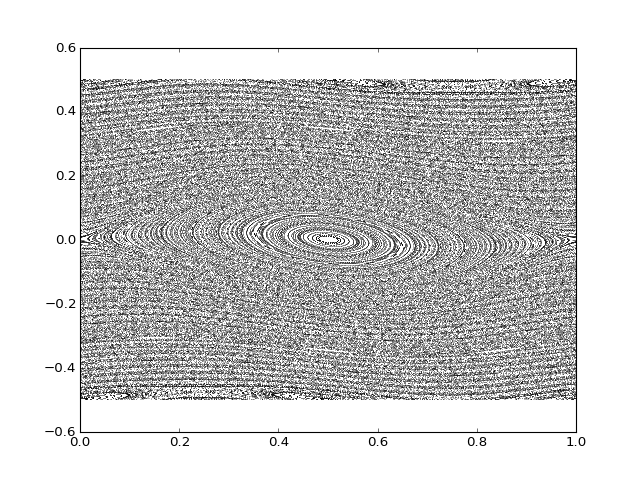

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Nmax = 100 #iterations
L = 50 # plotting grid
M = 1000 #starting points
K = 0.3

def std_map(xp, K):
    return np.array([np.mod(xp[:,0]+xp[:,1],1), 
                     np.mod(xp[:,1]+K*np.sin(2*np.pi*(xp[:,0]+xp[:,1]))/(2*np.pi)+0.5,1) -0.5]).transpose()


x,p = np.meshgrid(np.linspace(0,1,L),np.linspace(-0.5,0.5,L))
grid = np.zeros((L,L,2))
grid[:,:,0] = x
grid[:,:,1] = p
xp = grid.reshape(L*L,2)


plt.figure()
#plt.ylim([-0.5,0.5])
for n in range(1,Nmax+1):
    plt.plot(xp[:,0],xp[:,1],',k',alpha=0.3)
    xp = std_map(xp,K)
plt.show()